In [55]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

df = pd.read_csv("auto-mpg.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2 

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Ensure 'origin' column exists and convert to string type (if needed)
if 'origin' in df.columns:
    df['origin'] = df['origin'].astype(str)
else:
    print("Error: 'origin' column not found in dataset")

# Identify categorical columns
categorical_cols = ['origin']

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical column
encoded_origin = encoder.fit_transform(df[categorical_cols])

# Convert encoded data into a DataFrame
encoded_origin_df = pd.DataFrame(encoded_origin, 
                                 columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate with the original DataFrame (dropping original categorical columns)
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_origin_df], axis=1)

# Display the first few rows of the updated DataFrame
print(df_encoded.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

                    car name  origin_2  origin_3  
0  chevrolet chevelle malibu       0.0       0.0  
1          buick skylark 320       0.0       0.0  
2         plymouth satellite       0.0       0.0  
3              amc rebel sst       0.0       0.0  
4                ford torino       0.0       0.0  


In [57]:
# Scaling numeric features using StandardScaler
# Identifying numeric columns
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating a StandardScaler instance
scaler = StandardScaler()

# Fitting and transforming the numeric columns
scaled_numeric = scaler.fit_transform(df_encoded[numeric_cols])

# Creating a DataFrame from the scaled columns
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols)

# Concatenating the scaled numeric DataFrame with the encoded DataFrame
final_df = pd.concat([scaled_numeric_df, df_encoded.drop(numeric_cols, axis=1)], axis=1)

# Displaying the head of the final scaled DataFrame
print(final_df.head())

        mpg  cylinders  displacement    weight  acceleration  model year  \
0 -0.706439   1.498191      1.090604  0.630870     -1.295498   -1.627426   
1 -1.090751   1.498191      1.503514  0.854333     -1.477038   -1.627426   
2 -0.706439   1.498191      1.196232  0.550470     -1.658577   -1.627426   
3 -0.962647   1.498191      1.061796  0.546923     -1.295498   -1.627426   
4 -0.834543   1.498191      1.042591  0.565841     -1.840117   -1.627426   

   origin_2  origin_3 horsepower                   car name  
0 -0.461968 -0.497643        130  chevrolet chevelle malibu  
1 -0.461968 -0.497643        165          buick skylark 320  
2 -0.461968 -0.497643        150         plymouth satellite  
3 -0.461968 -0.497643        150              amc rebel sst  
4 -0.461968 -0.497643        140                ford torino  


In [58]:
# Checking for duplicate rows in the DataFrame
duplicates = df.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [59]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers per column
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).sum()

# Print outlier count per column
print("Number of outliers in each numeric column:")
print(outliers)


Number of outliers in each numeric column:
mpg             1
cylinders       0
displacement    0
weight          0
acceleration    7
model year      0
dtype: int64


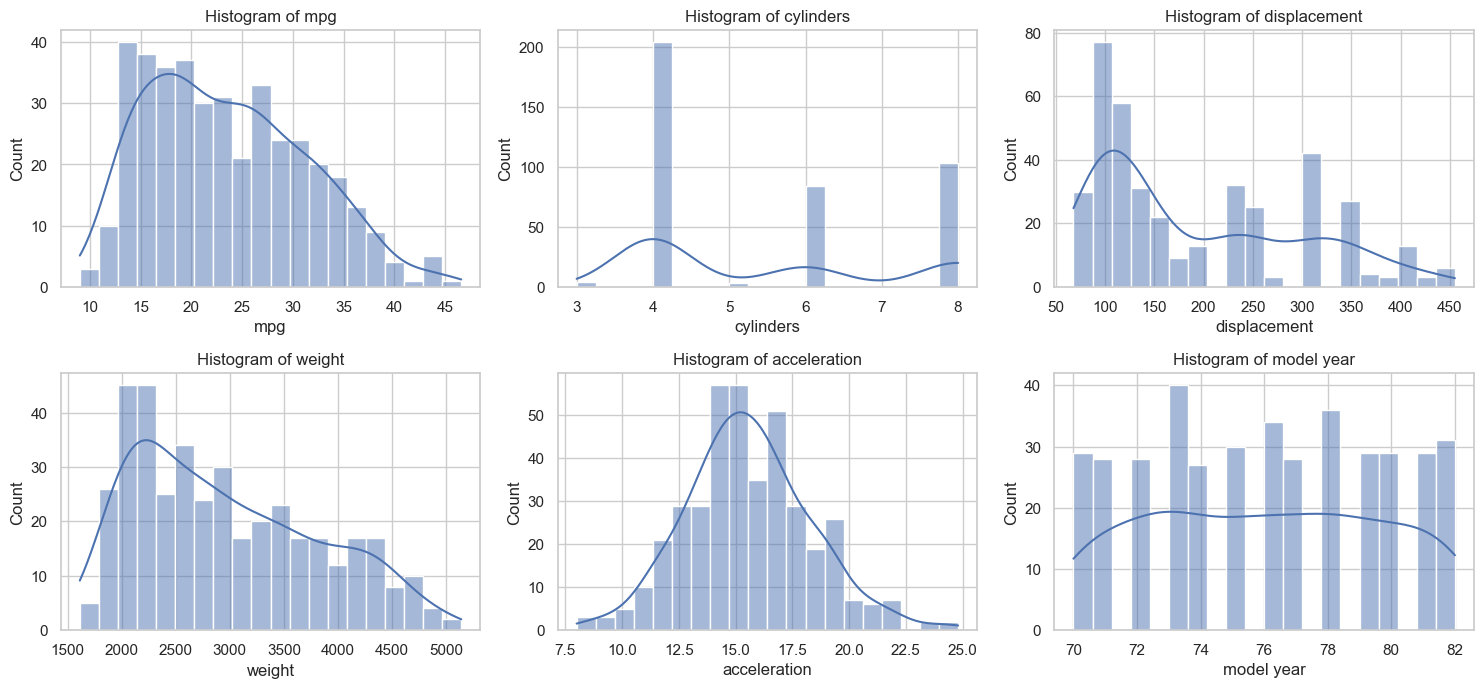

In [90]:
# Conducting Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style='whitegrid')

# Creating a histogram for each numeric feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(final_df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()



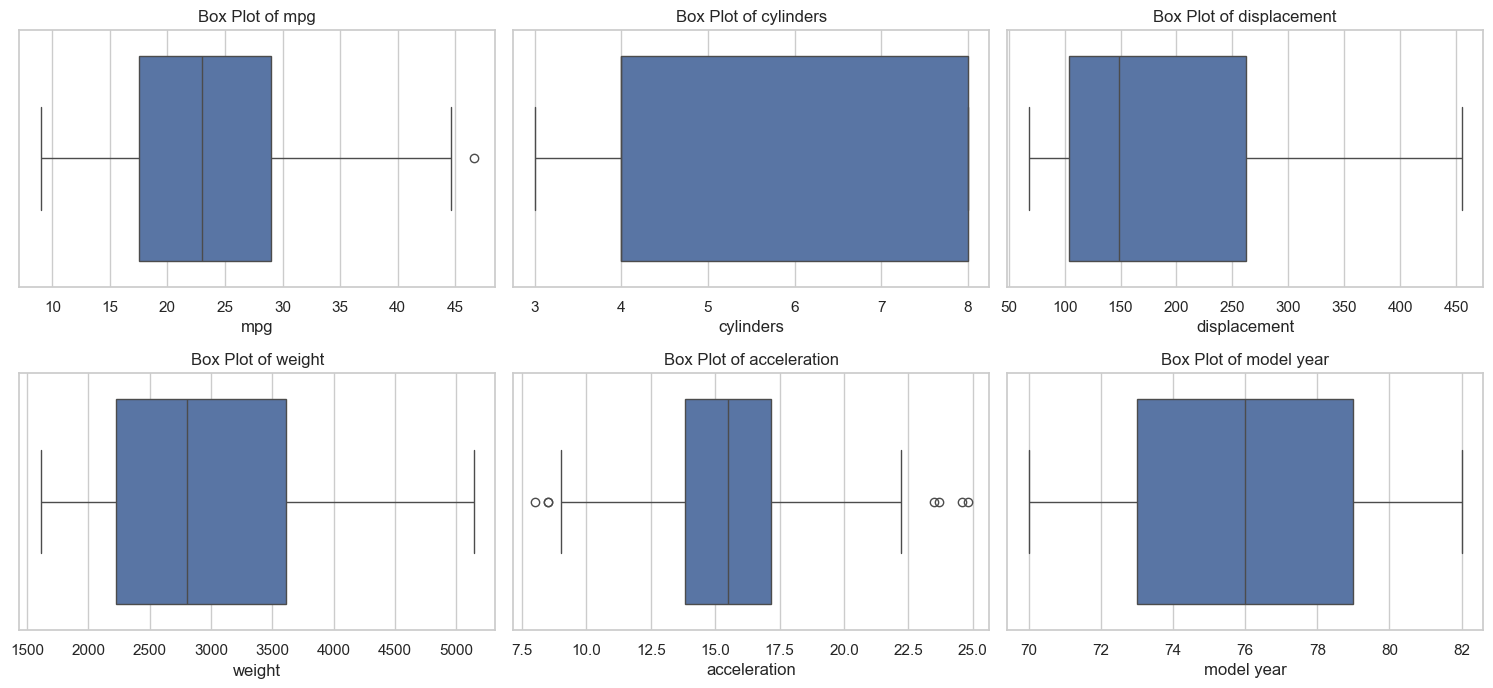

In [84]:
# Creating box plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=final_df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

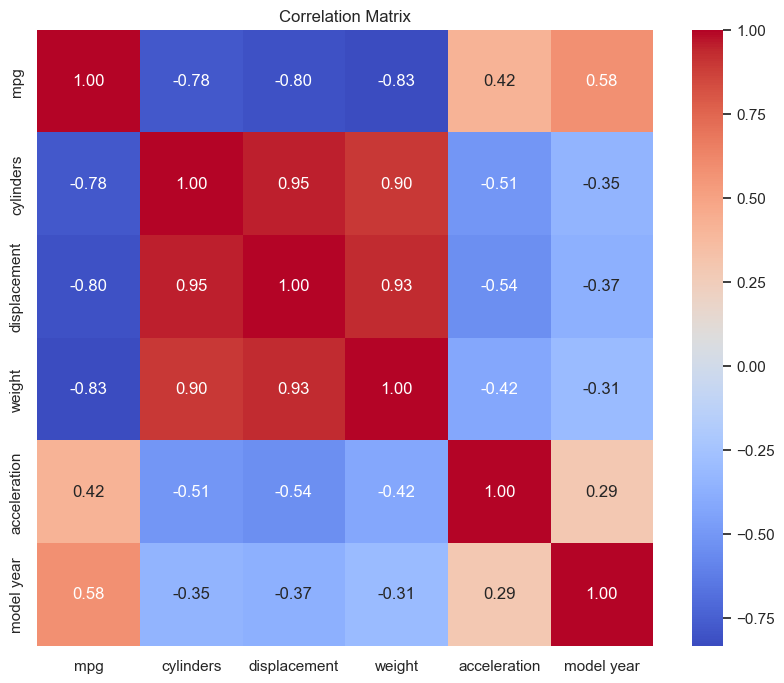

In [86]:
# Creating a correlation matrix
correlation_matrix = final_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [88]:
# Calculating summary statistics
summary_statistics = final_df.describe()
print(summary_statistics)

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.199187   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   95.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


In [68]:
# Analyzing patterns and anomalies in the summary statistics
# Identifying potential anomalies based on summary statistics
anomalies = {}

# Checking for features with outliers based on IQR method
for col in numeric_cols:
    if (final_df[col] < lower_bound[col]).any() or (final_df[col] > upper_bound[col]).any():
        anomalies[col] = final_df[(final_df[col] < lower_bound[col]) | (final_df[col] > upper_bound[col])]

# Displaying the anomalies found
anomalies_summary = {col: len(anomalies[col]) for col in anomalies}
print('Anomalies found in the following columns:')
print(anomalies_summary)

Anomalies found in the following columns:
{'mpg': 243, 'weight': 398, 'acceleration': 398, 'model year': 398}


In [70]:
# Extracting the rows corresponding to the identified anomalies
anomalous_rows = pd.concat([anomalies[col] for col in anomalies])

# Displaying the anomalous rows
print(anomalous_rows)

          mpg  cylinders  displacement    weight  acceleration  model year  \
0   -0.706439   1.498191      1.090604  0.630870     -1.295498   -1.627426   
1   -1.090751   1.498191      1.503514  0.854333     -1.477038   -1.627426   
2   -0.706439   1.498191      1.196232  0.550470     -1.658577   -1.627426   
3   -0.962647   1.498191      1.061796  0.546923     -1.295498   -1.627426   
4   -0.834543   1.498191      1.042591  0.565841     -1.840117   -1.627426   
..        ...        ...           ...       ...           ...         ...   
393  0.446497  -0.856321     -0.513026 -0.213324      0.011586    1.621983   
394  2.624265  -0.856321     -0.925936 -0.993671      3.279296    1.621983   
395  1.087017  -0.856321     -0.561039 -0.798585     -1.440730    1.621983   
396  0.574601  -0.856321     -0.705077 -0.408411      1.100822    1.621983   
397  0.958913  -0.856321     -0.714680 -0.296088      1.391285    1.621983   

     origin_2  origin_3 horsepower                   car name  